In [5]:
#기계학습응용 5주차 과제

#데이터 로드
import pandas as pd

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

pima = pd.read_csv("diabetes.csv", header = None, names = col_names)
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
x = pima[feature_cols]  #속성
y = pima.label  #당뇨병 여부


In [9]:
#모델 생성 및 훈련
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = x[1:]; y = y[1:]  #첫 행은 이름이기 때문에 자르고 다음 행부터 사용
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2)  #80:20으로 자름

model = LogisticRegression(max_iter = 10000)  #로지스틱 회귀 모델 생성
model.fit(train_x, train_y)  #모델에 데이터 삽입

LogisticRegression(max_iter=10000)

<confusion matrix의 결과>
 [[89  6]
 [22 37]]

<결과 분석>
TN(음성인데 음성이라고 예측 = 정답): 89
FN(양성인데 음성이라고 예측 = 오답): 6
FP(음성인데 양성이라고 예측 = 오답): 22
TP(양성인데 양성이라고 예측 = 정답): 37
AxesSubplot(0.125,0.125;0.62x0.755)


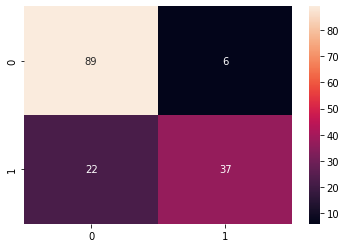

In [10]:
#테스트 및 confusion matrix 분석
#confusion matrix 순서 틀림
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred = model.predict(test_x)  #test_x에 대한 예측 결과

cm = confusion_matrix(test_y, pred)  #실제 결과, 예측 결과를 가지고 confusion matrix를 만듦
print("<confusion matrix의 결과>\n",cm)

print("\n<결과 분석>")
print("TN(음성인데 음성이라고 예측 = 정답):", cm[0,0])
print("FN(양성인데 음성이라고 예측 = 오답):", cm[0,1])
print("FP(음성인데 양성이라고 예측 = 오답):", cm[1,0])
print("TP(양성인데 양성이라고 예측 = 정답):", cm[1,1])

print(sns.heatmap(cm, annot = True))  #matrix를 출력, 그래프를 보기 편하게 하기 위해 각 상황의 결과(숫자)를 그래프 위에 출력